In [3]:
import numpy as np
import random
from math import *
import matplotlib.pyplot as plt
from itertools import permutations 

In [18]:
def cal_dis(D,squence):
    distance=0.0
    for i in range(len(squence)-1):
        distance += D[squence[i],squence[i+1]]
    else:
        # Return to first node
        distance += D[squence[-1],squence[0]]
    return distance

In [19]:
def exchange(squence,n=4):
    squence_copy = squence.copy()
    if type(squence) == list:
        node = random.sample(squence,n)
    else:
        node = random.sample(list(squence),n)
    squence_copy[node] = np.random.permutation(squence_copy[node])

    return squence_copy

In [20]:
def Global_sol(D):   
    all_possible = []
    perm = permutations(np.arange(10))
    print('Calculating all possible..')
    for i,p in enumerate(list(perm)):
        s = list(p)
        d = cal_dis(D,s)
        all_possible.append(d)
    sol = sorted(all_possible)[0]
    print('Find all {:d} possible'.format(i+1))
    print('Global Solution Distance: {:.0f}'.format(sol))
    return sol

In [21]:
# Initial Temperature
t0 = 300.0
# cooling schedule
def schedule(T_pre):
    return T_pre / (1+0.001*T_pre)
# Acceptance probability function
accept = lambda delta,t :exp(-delta/t)
# n_iter function
n_iter = lambda t: 2*(t0-t) + 10

Distance Martix:
 [[ 0. 46. 60. 73. 72. 43. 78. 35. 81. 73.]
 [46.  0. 64. 72. 85. 55. 77. 62. 59. 56.]
 [60. 64.  0. 84. 64. 58. 64. 75. 48. 86.]
 [73. 72. 84.  0. 40. 75. 73. 39. 57. 63.]
 [72. 85. 64. 40.  0. 64. 41. 50. 58. 81.]
 [43. 55. 58. 75. 64.  0. 79. 59. 44. 57.]
 [78. 77. 64. 73. 41. 79.  0. 33. 74. 44.]
 [35. 62. 75. 39. 50. 59. 33.  0. 73. 58.]
 [81. 59. 48. 57. 58. 44. 74. 73.  0. 53.]
 [73. 56. 86. 63. 81. 57. 44. 58. 53.  0.]]
Calculating all possible..
Find all 3628800 possible
Global Solution Distance: 454
---------------------------------------------
Final best total distance : 458
Final optimal tour :  [6 4 3 7 0 1 2 8 5 9]
Error compare to Global optimal solution:0.00881


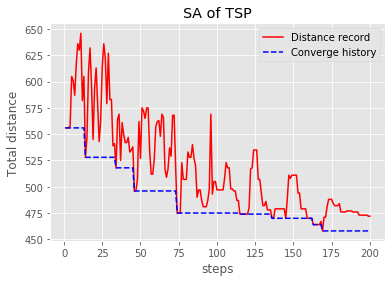

In [26]:
# Main code
# Random Distance Martix
D = np.random.randint(20,90+1, size=(10,10))
idx = [i for i in range(len(D))]
D[idx,idx] = 0
D = np.ceil((D + D.T)/2)
print('Distance Martix:\n',D)
#Calculate Global Solution
glo_sol =  Global_sol(D)
#Initial squence(tour)
sque = np.random.permutation(10)
steps = 200
best_dis = inf
distance_record=[]
distance_record_best=[]
for step in range(steps-1):
    t = t0 if step == 0 else schedule(t)
    total_dis = cal_dis(D,sque)
    # Always accept smaller solutions
    if total_dis < best_dis:
        best_dis = total_dis
        best_sq = sque 

    distance_record.append(total_dis)
    distance_record_best.append(best_dis)

    # print('step {:>3d} : Total distance {:.0f}'.format(step+1,total_dis))
    for n in range(round(n_iter(t))):
        sque_next = exchange(sque)
        delta =  cal_dis(D,sque_next) - total_dis
        if delta < 0:
            sque = sque_next
            break
        elif random.random() < accept(delta,t):
            sque = sque_next
            break

final_dis = cal_dis(D,sque)
distance_record.append(final_dis)

if final_dis < best_dis:
    best_sq = sque
    best_dis = final_dis

distance_record_best.append(best_dis)
error = (best_dis - glo_sol)/glo_sol 

print('---------------------------------------------')
print('Final best total distance : {:.0f}'.format(best_dis))
print('Final optimal tour : ', best_sq)
print('Error compare to Global optimal solution:{:.5f}'.format(error) )
#Plot converge history
x = np.arange(1,201)
plt.style.use('ggplot')
plt.plot(x,distance_record,'r-',label ='Distance record')
plt.plot(x,distance_record_best,'b--',label ='Converge history')
plt.xlabel('steps')
plt.ylabel('Total distance')
plt.title('SA of TSP')
plt.legend()
plt.grid(True)